Confusion Matrix: 
[[0 1]
 [0 3]] 
Classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


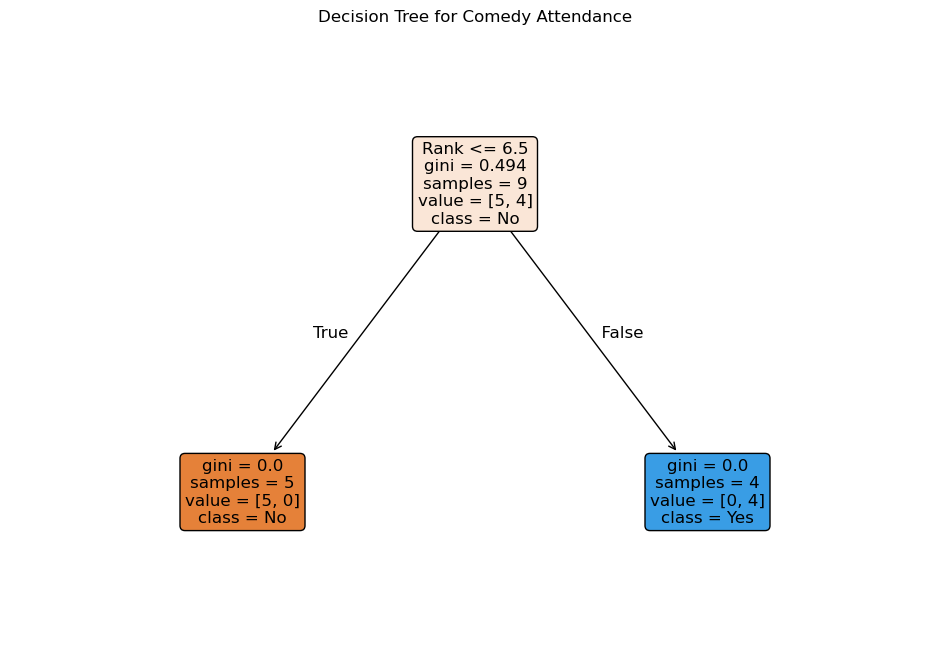

In [41]:
# Decision Tree Algorithm for Prediction the Comedy Show Attendance

# Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Encoding the data
from sklearn.preprocessing import LabelEncoder

data = {
    'Age': [36, 42, 23, 52, 43, 44, 66, 35, 52, 35, 24, 18, 45],
    'Experience': [10, 12, 4, 4, 21, 14, 3, 14, 13, 5, 3, 3, 9],
    'Rank': [9, 4, 6, 4, 8, 5, 7, 9, 7, 9, 5, 7, 9],
    'Nationality': ['UK', 'USA', 'N', 'USA', 'USA', 'UK', 'N', 'UK', 'N', 'N', 'USA', 'UK', 'UK'],
    'Go': ['NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES']
}

df = pd.DataFrame(data)
# print(f'Missing Data Info: \n{df.isnull().sum()} \n\nDataset Description: \n{df.describe} \n\nDataset Shape: {df.shape} {df.info()}')

# Encoding 'Nationality'
le_nation = LabelEncoder()
# df['Nationality'] = LabelEncoder.fit_transform(df['Nationality'])
df['Nation_encoded'] = le_nation.fit_transform(df['Nationality'])

# Encoding target Go (YES = 1, NO =1)
df['Go_encoded'] = LabelEncoder().fit_transform(df['Go'])

# Features (x) and Target (y)
x = df[['Age', 'Experience', 'Rank', 'Nation_encoded']]
y = df['Go_encoded']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Decision Tree model initialization
dt_model = DecisionTreeClassifier(random_state = 42)

# Fitting the model
dt_model.fit(x_train, y_train)

# Making predition - y_pred
y_pred = dt_model.predict(x_test)

# Evaluation
conf_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Confusion Matrix: \n{conf_mat} \nClassification report: \n{report}')

# Plotting Decision Tree
plt.figure(figsize = (12,8))
plot_tree(
    dt_model, 
    feature_names = ['Age', 'Experience', 'Rank', 'Nation_encoded'], 
    class_names = ['No', 'Yes'], 
    filled = True, 
    rounded = True, 
    fontsize = 12
)

plt.title('Decision Tree for Comedy Attendance')
plt.show()